# Analise de dados Climaticos
###### Os dados utilizados para analise podem ser encontrados nos sites abaixo.

    https://portal.inmet.gov.br/dadoshistoricos
    https://bdmep.inmet.gov.br/#

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

### O conjunto de dados utilizado nesta analise refere-se as estações de coleta climatica localizadas no estado de São Paulo, no periodo de 01/01/2021 a 31/08/2021.

##### Importação do arquivo csv contendo a base de dados que sera utilizada para analise e manipulação.

In [132]:
#leitura do arquivo
df = pd.read_csv("dados/consolidado.csv", encoding = "UTF-8", sep = ";", header = 0)

##### Leitura da base de dados e apresentação sumaria do conteudo.

In [133]:
#cabecalho do dataFrame
df.head()

,UF,ESTACAO,LATITUDE,LONGITUDE,ALTITUDE,DATA,DIA,MES,CHUVA_MM,TEMP_MAX,TEMP_MIN,UMI_MAX,UMI_MIN,VENTO_MAX_MS
0,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",01/01/2021,1,1,0,"28,5","24,1",81,59,"5,3"
1,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",02/01/2021,2,1,"0,2","28,1","23,2",86,62,"6,7"
2,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",03/01/2021,3,1,0,"30,7","22,4",87,52,"6,6"
3,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",04/01/2021,4,1,0,"31,1","20,3",86,46,"11,3"
4,SP,ARIRANHA,"-21,13305554","-48,84055555","525,44",05/01/2021,5,1,0,"30,9","24,2",81,44,"7,3"


In [134]:
#quantidade de linhas de dados
df.shape

(7000, 14)

In [135]:
#leitura das colunas
df.columns.values

array(['UF', 'ESTACAO', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'DATA',
       'DIA', 'MES', 'CHUVA_MM', 'TEMP_MAX', 'TEMP_MIN', 'UMI_MAX',
       'UMI_MIN', 'VENTO_MAX_MS'], dtype=object)

### Com a leituda da base de dados, podemos identificar que os dados estão organizados por Estação de coleta, localização, data, quantidade de chuva, temperatura maxima, temperatura minima, umidade maxima do ar, umidade minima do ar, velocidade maxima do vento.

In [136]:
#definição das colunas que serão utilizadas
usecols = ['UF', 'ESTACAO', 'LATITUDE', 'LONGITUDE',
       'DIA', 'MES', 'CHUVA_MM', 'TEMP_MAX', 'TEMP_MIN', 'UMI_MAX',
       'UMI_MIN', 'VENTO_MAX_MS']
dfuse = df.filter(items = usecols)
dfuse

,UF,ESTACAO,LATITUDE,LONGITUDE,DIA,MES,CHUVA_MM,TEMP_MAX,TEMP_MIN,UMI_MAX,UMI_MIN,VENTO_MAX_MS
0,SP,ARIRANHA,"-21,13305554","-48,84055555",1,1,0,"28,5","24,1",81,59,"5,3"
1,SP,ARIRANHA,"-21,13305554","-48,84055555",2,1,"0,2","28,1","23,2",86,62,"6,7"
2,SP,ARIRANHA,"-21,13305554","-48,84055555",3,1,0,"30,7","22,4",87,52,"6,6"
3,SP,ARIRANHA,"-21,13305554","-48,84055555",4,1,0,"31,1","20,3",86,46,"11,3"
4,SP,ARIRANHA,"-21,13305554","-48,84055555",5,1,0,"30,9","24,2",81,44,"7,3"
...,...,...,...,...,...,...,...,...,...,...,...,...
6995,SP,VOTUPORANGA,"-20,40333333","-49,96611111",27,8,0,"31,5","18,3",65,29,"11,1"
6996,SP,VOTUPORANGA,"-20,40333333","-49,96611111",28,8,0,"26,4","18,4",69,41,"12,5"
6997,SP,VOTUPORANGA,"-20,40333333","-49,96611111",29,8,0,"28,5","17,3",90,39,"8,2"
6998,SP,VOTUPORANGA,"-20,40333333","-49,96611111",30,8,0,"31,1","16,3",84,27,"8,1"


##### Quantidade de medições realizadas por Estação de coleta em todo o periodo.

In [137]:
estacao = dfuse['ESTACAO']
estacao.value_counts().sort_index()

ARIRANHA                  243
AVARE                      25
BARRA BONITA              242
BARRETOS                  230
BARUERI                   243
BAURU                     243
BERTIOGA                  238
BRAGANCA PAULISTA         243
CAMPOS DO JORDAO          243
DRACENA                    49
FRANCA                    243
IBITINGA                  243
IGUAPE                    185
ITAPEVA                   243
ITUVERAVA                 204
JALES                     243
LINS                       86
MARILIA                   243
PRADOPOLIS                243
PRESIDENTE PRUDENTE       243
RANCHARIA                 243
REGISTRO                  222
SAO CARLOS                243
SAO LUIS DO PARAITINGA    107
SAO MIGUEL ARCANJO        242
SAO PAULO - INTERLAGOS    243
SAO PAULO - MIRANTE       243
SAO SEBASTIAO              22
SAO SIMAO                 242
SOROCABA                  242
TAUBATE                    57
TUPA                      240
VALPARAISO                236
VOTUPORANG

##### Quantidade de medições realizadas por Mes.

In [138]:
mes = dfuse['MES']
mes.value_counts().sort_index()

1    1022
2     886
3     923
4     851
5     856
6     820
7     817
8     825
Name: MES, dtype: int64

### Obtenção dos dados da maior e menor temperatura registrada por Estacao e Mes.
##### Junto ao tratamento dos dados realizando a conversão dos valores em Float.

In [139]:
#maior temperatura registrada por estacao e mes
filt = ['MES','ESTACAO','TEMP_MAX']
maiorTemp = dfuse.filter(items = filt)
maiorTemp = maiorTemp.groupby(['MES','ESTACAO']).max().reset_index()
maiorTemp['TEMP_MAX'] = maiorTemp['TEMP_MAX'].apply(lambda x: float(str(x).replace(',','.')))
#maiorTemp = maiorTemp[maiorTemp.MES == 8].groupby('ESTACAO').max().reset_index()

In [140]:
filt = ['MES','ESTACAO','TEMP_MIN']
menorTemp = dfuse.filter(items = filt)
menorTemp = menorTemp.groupby(['MES','ESTACAO']).min().reset_index()
menorTemp['TEMP_MIN'] = menorTemp['TEMP_MIN'].apply(lambda x: float(str(x).replace(',','.')))
#menorTemp = menorTemp[menorTemp.MES == 8].groupby('ESTACAO').min().reset_index()

### Merge entre Maior temperatura por Estacao e Mes X Menor temperatura por Estacao e Mes.

In [141]:
#para filtrar por MES retirar o comentario da linha e comentar a linha superior
maiorxmenor = pd.merge(maiorTemp,menorTemp,how='right',left_on=['MES','ESTACAO'],right_on=['MES','ESTACAO'])
maiorxmenor

,MES,ESTACAO,TEMP_MAX,TEMP_MIN
0,1,ARIRANHA,35.3,18.7
1,1,AVARE,31.2,20.7
2,1,BARRA BONITA,34.9,20.4
3,1,BARRETOS,35.5,16.9
4,1,BARUERI,32.7,17.4
...,...,...,...,...
233,8,SAO SIMAO,35.9,10.2
234,8,SOROCABA,33.0,10.2
235,8,TUPA,36.7,10.2
236,8,VALPARAISO,38.8,10.7


In [142]:
#teste = dfuse[dfuse.MES==1]
#teste = teste[teste.ESTACAO=='BARUERI']
#teste['TEMP_MIN'].min()
#teste['TEMP_MAX'].max()

### Inserindo ao novo data frame os dados correspondentes as coordenadas das Estações.
##### Junto ao tratamento dos dados realizando a conversão das coordenadas em Float.

In [143]:
#tabela auxiliar para uso das coordenadas
filt = ['ESTACAO', 'LATITUDE', 'LONGITUDE']
cord = dfuse.filter(items = filt)
cord = cord.groupby(['ESTACAO', 'LATITUDE', 'LONGITUDE']).sum().reset_index()

In [144]:
#maiorxmenor.merge(cord,on='ESTACAO')
gfMaiorxmenor = pd.merge(maiorxmenor,cord,how='left',left_on=['ESTACAO'],right_on=['ESTACAO'])
gfMaiorxmenor['LATITUDE'] = gfMaiorxmenor['LATITUDE'].apply(lambda x: float(str(x).replace(',','.')))
gfMaiorxmenor['LONGITUDE'] = gfMaiorxmenor['LONGITUDE'].apply(lambda x: float(str(x).replace(',','.')))
gfMaiorxmenor

,MES,ESTACAO,TEMP_MAX,TEMP_MIN,LATITUDE,LONGITUDE
0,1,ARIRANHA,35.3,18.7,-21.133056,-48.840556
1,1,AVARE,31.2,20.7,-23.101667,-48.941111
2,1,BARRA BONITA,34.9,20.4,-22.471111,-48.557500
3,1,BARRETOS,35.5,16.9,-20.559167,-48.545000
4,1,BARUERI,32.7,17.4,-23.523889,-46.869444
...,...,...,...,...,...,...
233,8,SAO SIMAO,35.9,10.2,-21.461111,-47.579444
234,8,SOROCABA,33.0,10.2,-23.426111,-47.585556
235,8,TUPA,36.7,10.2,-21.927251,-50.490251
236,8,VALPARAISO,38.8,10.7,-21.319167,-50.930278


### Aqui podemos visualizar a representação grafica da relação entre temperaturas maximas coletadas por Estação.
#### De modo que podemos perceber que a temperatura ao decorrer do ano, no periodo de Janeiro até Junho permanece em queda. Até que, com a chegada do mes de Junho a temperatura passa a aumentar.

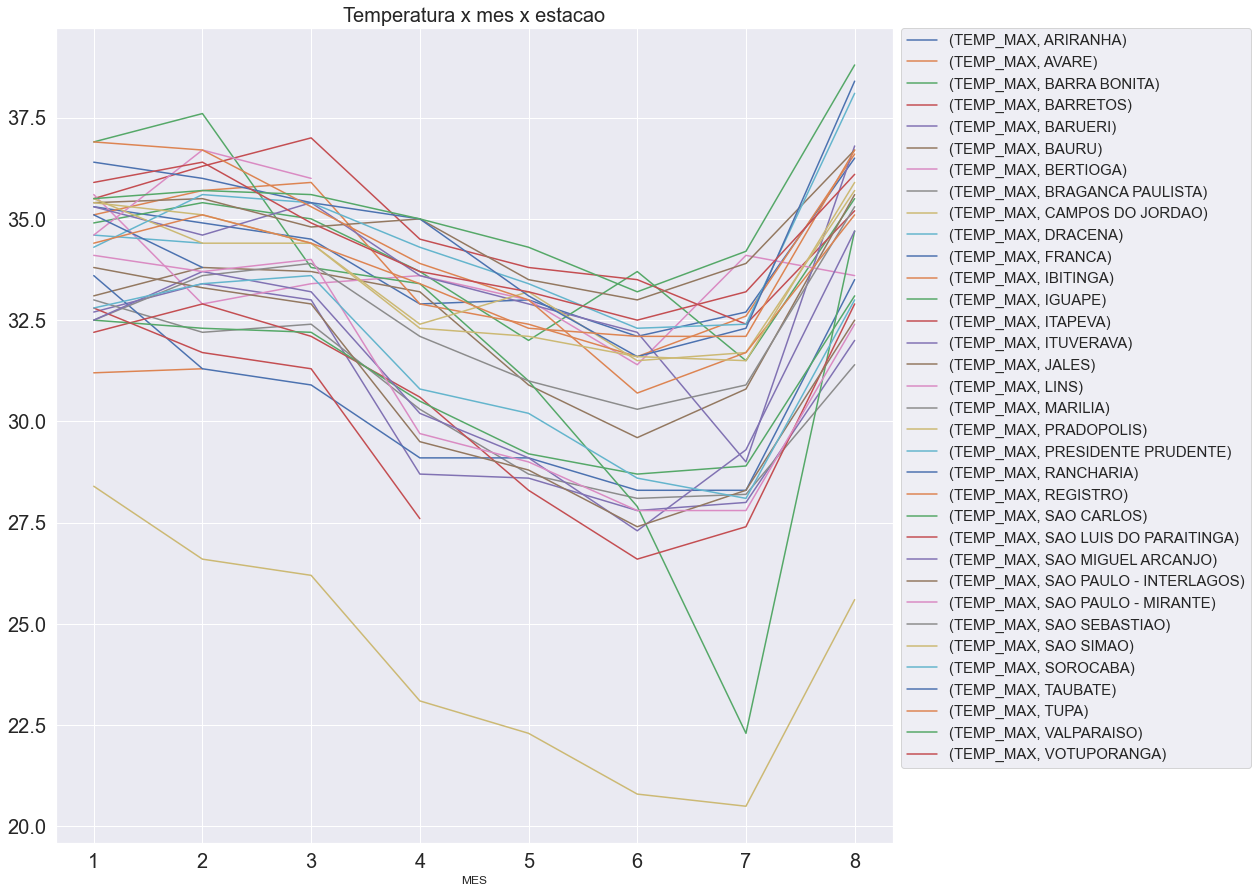

In [145]:
#Temperatura maxima x mes x estacao
#fig, ax = plt.subplots(figsize=(15,15))
#plt.suptitle("Temperatura max x mes x estacao")

ax = maiorxmenor.filter(items=['MES','ESTACAO','TEMP_MAX'])\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MAX', ascending=False)\
.unstack()\
.plot(figsize=(15,15), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)

### Aqui possuimos um grafico com outra representatividade de modo a facilitar a visualização em detalhe, mas que contempla a mesma informação.

Text(0.5, 1.0, 'Escala de temperatura maxima no periodo')

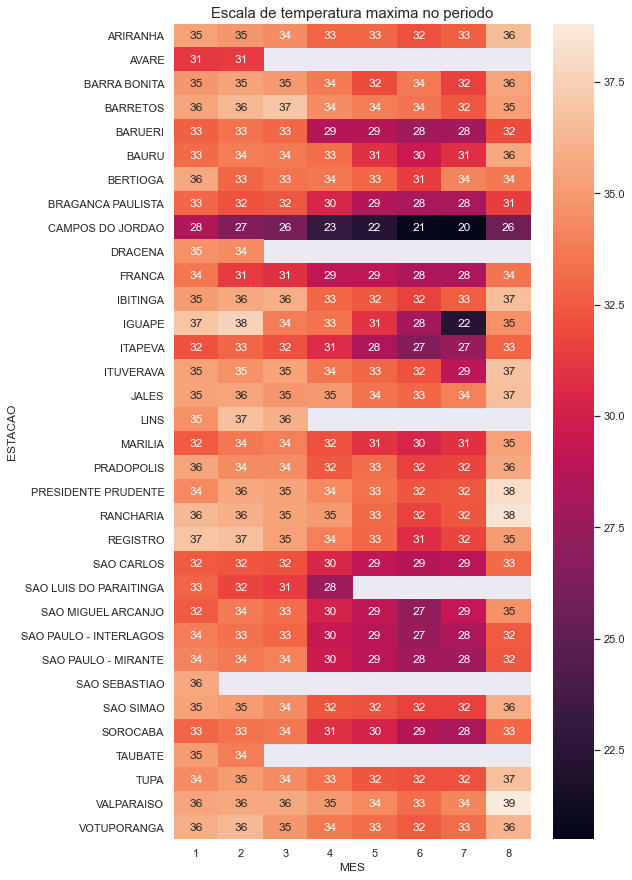

In [146]:
dfmax = maiorxmenor
dfmax = dfmax.pivot('ESTACAO','MES','TEMP_MAX')
f, ax = plt.subplots(figsize=(8,15))
ax = sns.heatmap(dfmax, ax=ax, annot=True)
ax.set_title('Escala de temperatura maxima no periodo', fontsize=15)

### Aqui podemos visualizar a representação grafica da relação entre temperaturas minimas coletadas por Estação.
#### De modo que podemos perceber que a temperatura ao decorrer do ano, no periodo de Janeiro até Junho permanece em queda. Até que, com a chegada do mes de Junho e Julho algumas Estações de coleta identificam picos de Frio antes de retornar as temperaturas mais quentes, podemos então com base no grafico, identificar que os meses com menor temperatura são identificados entre o periodo de Maio de Agosto, mais precisamente em Junho e Julho.

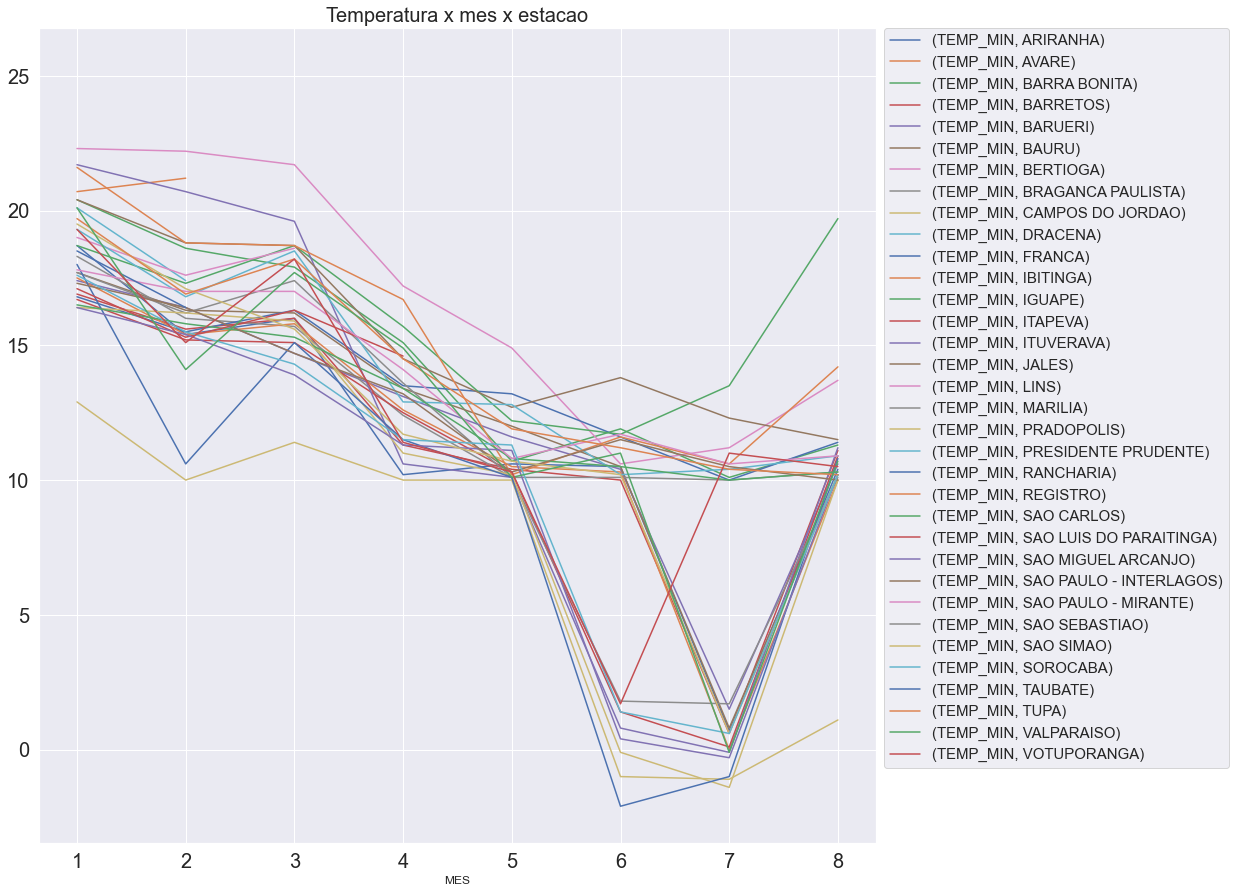

In [147]:
ax = maiorxmenor.filter(items=['MES','ESTACAO','TEMP_MIN'])\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MIN', ascending=False)\
.unstack()\
.plot(figsize=(15,15), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)

### Aqui possuimos um grafico com outra representatividade de modo a facilitar a visualização em detalhe, mas que contempla a mesma informação.

Text(0.5, 1.0, 'Escala de temperatura minima no periodo')

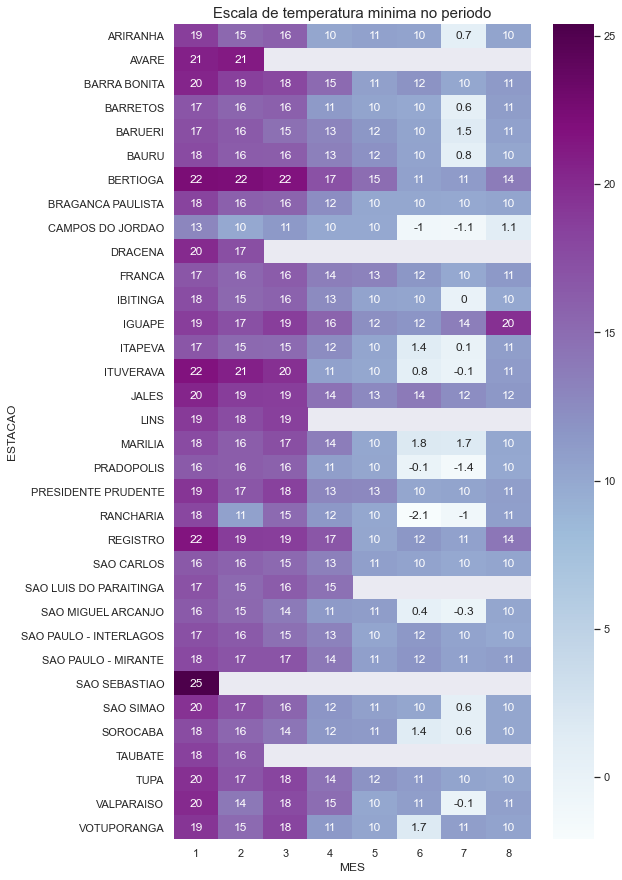

In [148]:
dfmin = maiorxmenor
dfmin = dfmin.pivot('ESTACAO','MES','TEMP_MIN')
f, ax = plt.subplots(figsize=(8,15))
ax = sns.heatmap(dfmin, ax=ax, annot=True, cmap="BuPu")
ax.set_title('Escala de temperatura minima no periodo', fontsize=15)

### Identificação das Estações de coleta com Maior e Menor temperatura registrada ao longo de todo o periodo

In [149]:
filt = ['MES','ESTACAO','TEMP_MAX','TEMP_MIN']
dfmin = dfuse.filter(items = filt)
dfmin = dfmin.groupby(['MES']).min().reset_index()
dfmin['TEMP_MIN'] = dfmin['TEMP_MIN'].apply(lambda x: float(str(x).replace(',','.')))
dfmin['TEMP_MAX'] = dfmin['TEMP_MAX'].apply(lambda x: float(str(x).replace(',','.')))
dfmax = dfuse.filter(items = filt)
dfmax = dfmax.groupby(['MES']).max().reset_index()
dfmax['TEMP_MAX'] = dfmax['TEMP_MAX'].apply(lambda x: float(str(x).replace(',','.')))
dfmax['TEMP_MIN'] = dfmax['TEMP_MIN'].apply(lambda x: float(str(x).replace(',','.')))
Estacaomaiorxmenor = dfmin.append(dfmax)

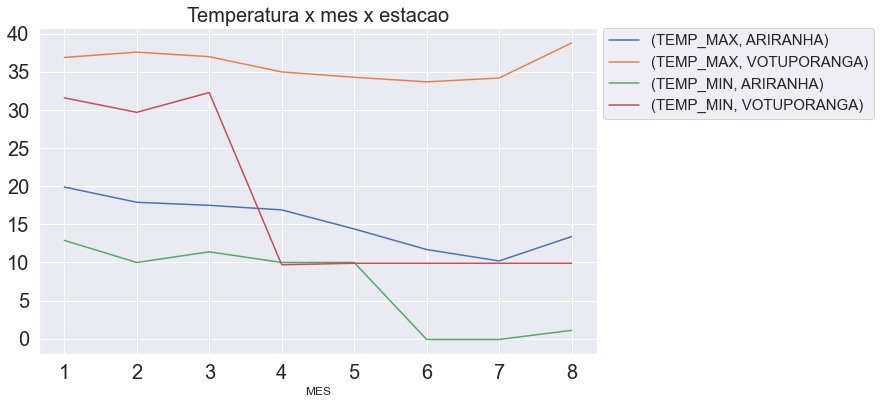

In [150]:
#Temperatura maxima x temperatura minima mes x estacao
#fig, ax = plt.subplots(figsize=(10,6))
#plt.suptitle("Temperatura x mes x estacao")
ax = Estacaomaiorxmenor.filter(items=['MES','ESTACAO','TEMP_MAX','TEMP_MIN'])\
.groupby(['MES','ESTACAO'])\
.mean()\
.sort_values(by='TEMP_MAX', ascending=False)\
.unstack()\
.plot(figsize=(10,6), fontsize=20)

ax.set_title('Temperatura x mes x estacao',fontsize=20)
ax.legend(bbox_to_anchor=(1.01, 1), loc=0, borderaxespad=0., fontsize=15)

### Quebrar dados em conjunto de treino e conjunto de testes.

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
X = maiorxmenor
y = maiorxmenor
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

(238, 4) (238, 4)


In [153]:
print(f"Tamanho => X_train: {X_train.shape}")
print(f"Tamanho => X_test: {X_test.shape}")
print(f"Tamanho => y_train: {y_train.shape}")
print(f"Tamanho => y_test: {y_test.shape}")

Tamanho => X_train: (166, 4)
Tamanho => X_test: (72, 4)
Tamanho => y_train: (166, 4)
Tamanho => y_test: (72, 4)


### Criar um Classificador ou Regressor com  scikit-learn

### Verificar o desempenho do estimador do scikit-learn no conjunto de teste